In [ ]:
#F1 : Shifted Sphere_F1_Dim500

In [59]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [60]:
#set desktop or system path
import sys
sys.path.append('C:\\DCHAVAN\\DSTI-Masters\\Curriculum\\2020\\Metaheuristics\\Assignment\\Project\\DataF1F6')

In [61]:
dataf1 = pd.read_csv("f1.csv")
ssf_data = dataf1["f1data"].tolist()
dataf1.head(10)

,f1data
0,-99.303451
1,-98.959765
2,-97.122955
3,-93.975881
4,-86.422208
5,-86.141248
6,-83.810496
7,-83.121793
8,-78.056147
9,-74.721445


In [62]:
# Function parameters
D = 500
bias = -450
lower_bound = -100
upper_bound = 100

In [63]:
# Shifted Sphere function with the parameters
def function(x, data=ssf_data, dim=D, f_bias=bias):
    F = 0
    for i in range(dim - 1):
        z = x[i] - data[i]
        F += z*z
    fc = F + f_bias
    return fc

In [64]:
#Function to compute the random uniform distribution
def fc_sol(dim, lower_bound, upper_bound):
    xmin = lower_bound * np.ones(dim)
    xmax = upper_bound * np.ones(dim)
    x0 = np.random.uniform(min(xmin), max(xmax), dim)
    return x0

In [65]:
list_sol = []
def all_sol(xk):
    fc_sol = function(xk)
    list_sol.append(fc_sol)
    return fc_sol

In [66]:
# F1-Function to solve the equation
def solver(dimension, lower_bound, upper_bound):
    global f1sol
    # Compute the initial guess
    x0 = fc_sol(dimension, lower_bound, upper_bound)
    # Minimize the function from BFGS algorithm
    f1sol = minimize(all_sol, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=all_sol)
    return f1sol, list_sol

In [67]:
def plot_fitness(solution):
    fig = plt.figure(figsize=(16, 13))
    plt.plot(solution)

In [68]:
plt.show()

In [69]:
# Solve the problem
solver(D, lower_bound, upper_bound)

(      fun: -449.99999999910324
  hess_inv: array([[ 9.95541187e-01,  6.50466827e-05, -3.95580187e-03, ...,
          4.74095036e-03,  3.28015987e-03,  0.00000000e+00],
        [ 6.50466827e-05,  9.99971989e-01, -1.39070025e-04, ...,
         -2.42135861e-04,  2.58465445e-05,  0.00000000e+00],
        [-3.95580187e-03, -1.39070025e-04,  9.95059634e-01, ...,
          2.94837626e-03,  3.44599765e-03,  0.00000000e+00],
        ...,
        [ 4.74095036e-03, -2.42135861e-04,  2.94837626e-03, ...,
          9.93853480e-01, -3.01666319e-03,  0.00000000e+00],
        [ 3.28015987e-03,  2.58465445e-05,  3.44599765e-03, ...,
         -3.01666319e-03,  9.97386224e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
       jac: array([ 0.00000000e+00,  0.00000000e+00,  3.81469727e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.81469727e-06,
         0.00000000e+00,

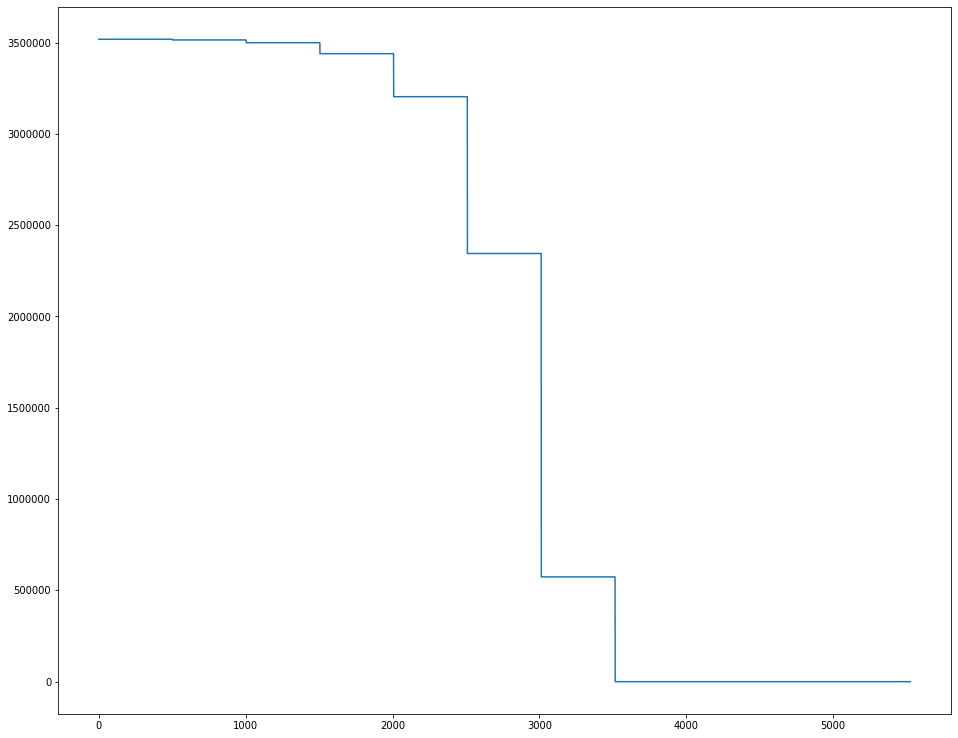

In [70]:
plot_fitness(list_sol)

In [71]:
f1_sol = pd.DataFrame(f1sol.x, columns=[''])
f1_sol.to_csv("f1_sphere500.csv", sep=",")